# Visualize Twitch Gaming Data

In this project, we will visualize Twitch data using Python and Matplotlib, in the forms of:

- **Bar Graph:** Featured Games
- **Pie Chart:** Stream Viewers’ Locations
- **Line Graph:** Time Series Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import matplotlib.ticker as mticker  # Import ticker for formatting


# load rankings data
chat = pd.read_csv('data/chat.csv')
stream = pd.read_csv('data/video_play.csv')

# View dataframe info
chat.info()
stream.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148562 entries, 0 to 148561
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   time       148562 non-null  object
 1   device_id  148560 non-null  object
 2   login      148562 non-null  object
 3   channel    148562 non-null  object
 4   country    142641 non-null  object
 5   player     37536 non-null   object
 6   game       148221 non-null  object
dtypes: object(7)
memory usage: 7.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526299 entries, 0 to 526298
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   time           526299 non-null  object
 1   device_id      526271 non-null  object
 2   login          526299 non-null  object
 3   channel        526299 non-null  object
 4   country        509135 non-null  object
 5   player         526299 non-null  object
 6   game           523175 n

In [189]:
# Get the stream dataset time range
stream['time'].min(), stream['time'].max()

('2015-01-01 00:00:00', '2015-01-01 23:59:59')

In [190]:
# Inspect data
stream.describe()

,time,device_id,login,channel,country,player,game,stream_format,subscriber
count,526299,526271,526299,526299,509135,526299,523175,267332,273814
unique,80706,267629,258313,10,166,16,41,5,2
top,2015-01-01 01:52:07,cbe05861add0794349c485e375ccc8f105a33e0b,be95fab358b45e0493b38ed5f0a0ff1fe9481214,frank,US,site,League of Legends,chunked,False
freq,91,231,232,194300,190378,246115,193533,141259,263845


## Bar Graph: Featured Games

#### Data Preparation

In [191]:
# Group by 'game' and count the number of logins to determine popularity
featured_games = stream[['game', 'login']].groupby('game').count().sort_values(by='login', ascending=False)

# Select the top 10 most popular games based on the number of logins
top10_featured_games = featured_games[:10]

# Display the full list of games sorted by popularity
#featured_games
# Display the top 10 featured games
top10_featured_games

,login
game,
League of Legends,193533
Dota 2,85608
Counter-Strike: Global Offensive,54438
DayZ,38004
Heroes of the Storm,35310
The Binding of Isaac: Rebirth,29467
Gaming Talk Shows,28115
World of Tanks,15932
Hearthstone: Heroes of Warcraft,14399


In [192]:
# Define a list of the top 10 most popular games based on previous analysis
top10_game_list = ['LoL', 'Dota 2', 'CS: GO',
       'DayZ', 'HoS', 'Isaac: Rebirth',
       'Gaming Talk Shows', 'WoT',
       'Hearthstone: HoW', 'Agar.io']

# Display the top 10 game list
top10_game_list

['LoL',
 'Dota 2',
 'CS: GO',
 'DayZ',
 'HoS',
 'Isaac: Rebirth',
 'Gaming Talk Shows',
 'WoT',
 'Hearthstone: HoW',
 'Agar.io']

#### Visualization

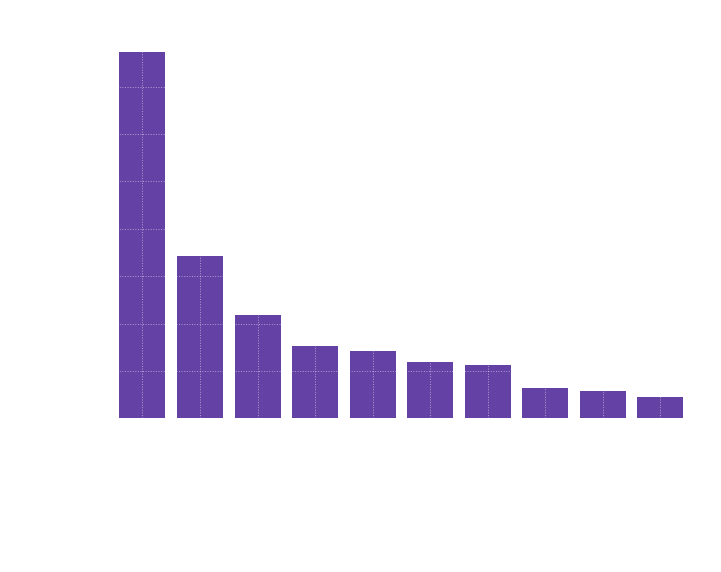

<Figure size 640x480 with 0 Axes>

In [193]:
# Define the dark theme to match the slide design
plt.style.use('dark_background')

# Create the figure and axis with a transparent background
fig, ax = plt.subplots(figsize=(8, 5), facecolor='none')

# Set color scheme to match the Twitch slide deck (purple theme)
line_color = '#A780F6'  # Soft purple
fill_color = '#A780F6'  # Soft purple for transparency


plt.bar(range(len(top10_featured_games)), top10_featured_games['login'], color='#6441a5', label='Twitch')

# Tick configuration
ax.set_xticks(range(len(top10_featured_games)))  # Ensure ticks match bar positions
ax.set_xticklabels(top10_game_list, rotation=45, ha='right')  # Rotate and align labels

# Customize chart appearance to match slide
ax.set_facecolor('none')  # Transparent background
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# Add dotted grid lines (to match slide design)
ax.grid(color='white', linestyle='dotted', linewidth=0.7, alpha=0.5) # add parameter axis='y' for horizontal lines only

# Remove grid lines and axis lines (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set labels, title, and fonts to match slide design
ax.set_title('Featured Games Viewers', fontsize=14, color='white', fontweight='bold')
ax.set_xlabel('Games', fontsize=12, color='white', labelpad=10)
ax.set_ylabel('Viewers', fontsize=12, color='white', labelpad=15)

# Customize ticks to match slide
ax.tick_params(axis='both', colors='white', labelsize=10)
# Format Y-axis labels in 'XK' format (e.g., 10K, 20K)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

# Save the plot with transparent background
plt.savefig('Visualizations/featured_games_viewers.png', transparent=True, dpi=300)

# Show the final chart
plt.show()
plt.clf()

## Pie Chart: League of Legends Viewers' Whereabouts

#### Data Preparation

In [194]:
# Fill missing values in the 'country' column with 'N/A'
stream['country'] = stream['country'].fillna('N/A')

# Check if there are any remaining missing values in the 'country' column
stream['country'].isna().sum()

0

In [195]:
# Group by 'country' and count the number of unique logins to determine viewership by country for LOL
lol_viewers_by_country = stream[['country', 'login']][stream['game'] == 'League of Legends'].groupby('country').count().sort_values(by='login', ascending=False)

# Display the final dataframe showing LoL viewership by country
lol_viewers_by_country

,login
country,
US,85606
CA,13034
DE,10835
N/A,7641
GB,6964
...,...
AD,1
MQ,1
GY,1


In [196]:
# Separate countries above and below the threshold
above_threshold = lol_viewers_by_country.head(11)

# Group the rows below the threshold into 'Others'
others = pd.DataFrame({
    'login': [lol_viewers_by_country.iloc[11:]['login'].sum()]  # Sum the rest
}, index=['Others'])

# Combine the above-threshold countries and 'Others'
final_result = pd.concat([above_threshold, others])
final_result


,login
US,85606
CA,13034
DE,10835
N/A,7641
GB,6964
TR,4412
AU,3911
SE,3533
NL,3213
DK,2909


#### Visualization

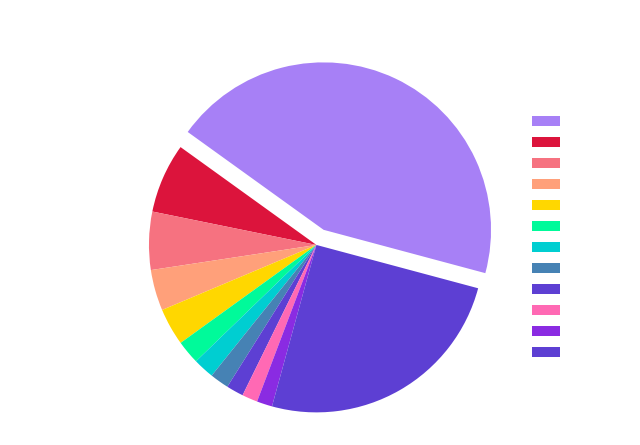

<Figure size 640x480 with 0 Axes>

In [197]:
# Create the figure and axis with a transparent background
fig, ax = plt.subplots(figsize=(8, 5), facecolor='none')

# Define a high-contrast color palette for better distinction
colors = [
    "#A780F6", "#DC143C", "#F67280", "#FFA07A", "#FFD700", "#00FA9A",
    "#00CED1", "#4682B4", "#5D3FD3", "#FF69B4", "#8A2BE2", "#5D3FD3"
]

# Define the explode values for emphasis (highlighting the largest slice)
explode = [0.1 if i == 0 else 0 for i in range(len(final_result.index))]

# Plot the pie chart
plt.pie(
    final_result['login'], 
    explode=explode, 
    shadow=False, 
    startangle=345, 
    autopct='%1.0f%%', 
    pctdistance=1.15, 
    textprops={'fontsize': 10, 'color': 'white'},  # Text formatting for readability
    colors=colors  # Apply custom Twitch-style colors
)

# Ensure the chart remains circular
plt.axis('equal')

# Add title and legend
plt.title("League of Legends Viewers' Whereabouts", fontsize=14, color='white', pad=15, fontweight="bold")
plt.legend(final_result.index, loc='center right', fontsize=10, frameon=False, labelcolor='white')

# Save the plot with transparent background
plt.savefig('Visualizations/lol_viewers_country.png', transparent=True, dpi=300)

# Show the plot
plt.show()

# Clear the figure after display
plt.clf()

## Line Graph: Time Series Analysis

#### Data Preparation

In [198]:
# Convert 'timestamp' column to datetime
stream['time'] = pd.to_datetime(stream['time'])
# Extract the hour from the 'time' column and create a new 'hour' column
stream['hour'] = stream['time'].dt.hour

# Group by 'hour' and count the number of unique logins to determine hourly viewership trends
us_viewers_by_hour = stream[['hour','login']][stream['country'] == 'US'].groupby('hour').count()

# Display the final dataframe showing US viewership by hour
us_viewers_by_hour

,login
hour,
0,7025
1,4693
2,5961
3,4236
4,3567
5,1597
6,236
7,338
8,935


In [199]:
# Calculate the upper bound by increasing each login count by 15%
y_upper = [i + (i*0.15) for i in us_viewers_by_hour['login']]
# Calculate the lower bound by decreasing each login count by 15%
y_lower = [i - (i*0.15) for i in us_viewers_by_hour['login']]
# Display the upper and lower bound lists
y_upper, y_lower

([8078.75,
  5396.95,
  6855.15,
  4871.4,
  4102.05,
  1836.55,
  271.4,
  388.7,
  1075.25,
  1396.1,
  2231.0,
  8451.35,
  13530.9,
  11201.0,
  8649.15,
  10424.75,
  11654.1,
  13718.35,
  14047.25,
  17486.9,
  22604.4,
  21188.75,
  16081.6,
  13392.9],
 [5971.25,
  3989.05,
  5066.85,
  3600.6,
  3031.95,
  1357.45,
  200.6,
  287.3,
  794.75,
  1031.9,
  1649.0,
  6246.65,
  10001.1,
  8279.0,
  6392.85,
  7705.25,
  8613.9,
  10139.65,
  10382.75,
  12925.1,
  16707.6,
  15661.25,
  11886.4,
  9899.1])

#### Visualization

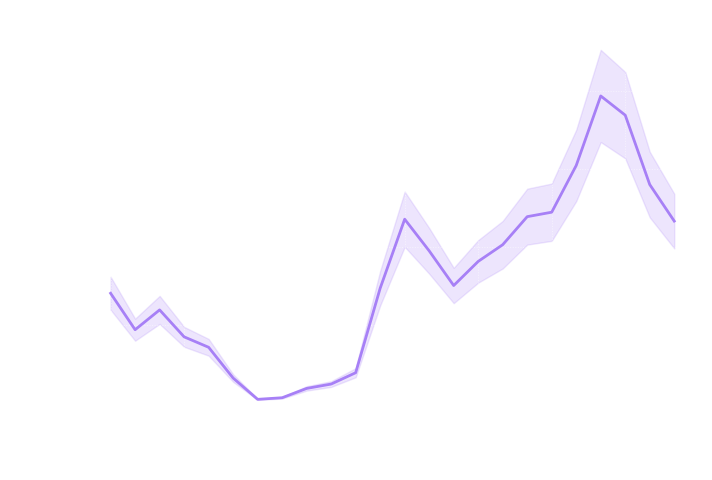

In [200]:
# Define the dark theme to match the slide design
plt.style.use('dark_background')

# Create the figure and axis with a transparent background
fig, ax = plt.subplots(figsize=(8, 5), facecolor='none')

# Set color scheme to match the Twitch slide deck (purple theme)
line_color = '#A780F6'  # Soft purple
fill_color = '#A780F6'  # Soft purple for transparency

# Plot the viewer trends line with shading (to match slide aesthetics)
sns.lineplot(x=us_viewers_by_hour.index, y=us_viewers_by_hour['login'], color=line_color, linewidth=2)
ax.fill_between(us_viewers_by_hour.index, y_upper, y_lower, color=fill_color, alpha=0.2)  # Transparency effect

# Customize chart appearance to match slide
ax.set_facecolor('none')  # Transparent background
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# Add dotted grid lines (to match slide design)
ax.grid(color='white', linestyle='dotted', linewidth=0.7, alpha=0.5)

# Remove grid lines and axis lines (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set labels, title, and fonts to match slide design
ax.set_title('Viewer Trends Over Time', fontsize=14, color='white', fontweight='bold')
ax.set_xlabel('Hour', fontsize=12, color='white', labelpad=10)
ax.set_ylabel('Viewers', fontsize=12, color='white', labelpad=15)

# Customize ticks to match slide
ax.tick_params(axis='both', colors='white', labelsize=10)
# Format Y-axis labels in 'XK' format (e.g., 10K, 20K)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

# Convert hours to AM/PM format
hour_labels = [f"{h%12 if h%12 else 12}{' AM' if h < 12 else ' PM'}" for h in us_viewers_by_hour.index]
ax.set_xticks(us_viewers_by_hour.index[::3])
ax.set_xticklabels(hour_labels[::3])



# Save the plot with transparent background
plt.savefig('Visualizations/viewer_trends_transparent.png', transparent=True, dpi=300)

# Show the final chart
plt.show()

#### Top 5 streaming countries

In [201]:
# Group by 'country' and count the number of unique logins to determine viewership by country
viewers_by_country = stream[['country', 'login']][stream['country'] != 'N/A'].groupby('country').count().sort_values(by='login', ascending=False)

viewers_by_country

,login
country,
US,190378
RU,29807
TW,29489
DE,29262
CA,27350
...,...
SN,1
SM,1
MP,1


In [202]:
# Separate countries above and below the threshold
top_5 = viewers_by_country.head(5)
top_5

,login
country,
US,190378
RU,29807
TW,29489
DE,29262
CA,27350


### Visualization

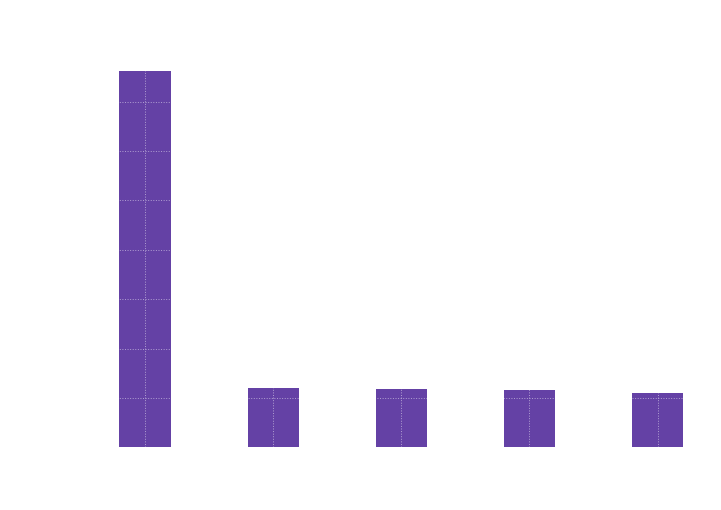

<Figure size 640x480 with 0 Axes>

In [203]:
# Define the dark theme to match the slide design
plt.style.use('dark_background')

# Create the figure and axis with a transparent background
fig, ax = plt.subplots(figsize=(8, 5), facecolor='none')
# Adjust layout to add space at the top
fig.subplots_adjust(top=0.9, hspace=1)

# Set color scheme to match the Twitch slide deck (purple theme)
line_color = '#A780F6'  # Soft purple
fill_color = '#A780F6'  # Soft purple for transparency

# Plot a bar chart of Top 5 Countries
plt.bar(range(len(top_5)), top_5['login'], color='#6441a5', label='Twitch', width=0.4)

# Tick configuration
ax.set_xticks(range(len(top_5)))  # Ensure ticks match bar positions
ax.set_xticklabels(top_5.index)  # Rotate and align labels

# Customize chart appearance to match slide
ax.set_facecolor('none')  # Transparent background
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# Add dotted grid lines (to match slide design)
ax.grid(color='white', linestyle='dotted', linewidth=0.7, alpha=0.5) # add parameter axis='y' for horizontal lines only

# Remove grid lines and axis lines (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set labels, title, and fonts to match slide design
ax.set_title('Countries with the most streams', fontsize=14, color='white', fontweight='bold', pad=20)
ax.set_xlabel('Countries', fontsize=12, color='white', labelpad=10)
ax.set_ylabel('Viewers', fontsize=12, color='white', labelpad=15)

# Customize ticks to match slide
ax.tick_params(axis='both', colors='white', labelsize=10)
# Format Y-axis labels in 'XK' format (e.g., 10K, 20K)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

# Save the plot with transparent background
plt.savefig('Visualizations/top_5_countries.png', transparent=True, dpi=300)

# Show the final chart
plt.show()
plt.clf()